In [1]:
# Packages importieren
import joblib
import shap
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Datenabrufen
X_train = pd.read_csv("../Resampling/X_train.csv", index_col=0)
X_test = pd.read_csv("../Resampling/X_test.csv", index_col=0)
X_val = pd.read_csv("../Resampling/X_val.csv", index_col=0)

X_train_stm = pd.read_csv("../Resampling/X_train_stm.csv", index_col=0)
X_test_stm = pd.read_csv("../Resampling/X_test_stm.csv", index_col=0)
X_val_stm = pd.read_csv("../Resampling/X_val_stm.csv", index_col=0)

y_train = pd.read_csv("../Resampling/y_train.csv", index_col=0)
y_train_stm = pd.read_csv("../Resampling/y_train_stm.csv", index_col=0)

y_test = pd.read_csv("../Resampling/y_test.csv", index_col=0)
y_val = pd.read_csv("../Resampling/y_val.csv", index_col=0)

print("Alle Datensätze wurden importiert.")

Alle Datensätze wurden importiert.


In [3]:
# Path vorbereiten und Model importieren
modell = joblib.load('../Modelle/KNN-Model/knn.pkl')

## E_T_KNN_1: Analyse der intrinsische Erklärbarkeit von k-Nearest-Neighbours

In [4]:
'''test_index = 2
x_query = X_test.iloc[[test_index]]
true_label = y_test.iloc[test_index].tolist() if hasattr(y_test, "columns") else y_test.iloc[test_index]
distances, indices = modell.kneighbors(x_query)

neighbor_data = []
for rank, (idx, dist) in enumerate(zip(indices[0], distances[0]), start=1):
    # label aus dem Trainings‑Set holen
    neigh_label = y_train.iloc[idx] if hasattr(y_train, "iloc") else modell._y[idx]

    row = {
        'Rank': rank,
        'Train Index': idx,
        'Distance': dist,
        'Neighbor Label': neigh_label
    }
    # Merkmalswerte der Trainings‑Instanz
    for i, feat in enumerate(X_train.columns if hasattr(X_train, "columns") else range(X_train.shape[1])):
        value = (X_train.iloc[idx, i]
                 if hasattr(X_train, "iloc")
                 else X_train[idx, i])
        row[feat] = value

    neighbor_data.append(row)

import pandas as pd
df_neighbors = pd.DataFrame(neighbor_data)
print(df_neighbors)'''

    Rank  Train Index  Distance  \
0      1       116309  0.085295   
1      2       124997  0.200278   
2      3        10071  0.229443   
3      4        36417  0.340066   
4      5       154886  0.344426   
5      6        54668  0.373592   
6      7        37071  0.455049   
7      8        91001  0.517740   
8      9        93321  0.529615   
9     10        65451  0.553013   
10    11       154848  0.577146   
11    12       121271  0.584261   
12    13       101716  0.606312   
13    14         8659  0.632723   
14    15        64433  0.638442   
15    16        13573  0.661888   
16    17        15968  0.683891   
17    18       134212  0.729339   
18    19       117397  0.749065   
19    20         5572  0.776871   
20    21       105626  0.799291   
21    22        80839  0.806037   
22    23        37247  0.865443   
23    24        97635  0.921020   
24    25        53208  0.926739   
25    26         7617  0.950185   
26    27        52483  0.972188   
27    28        2284

## E_T_KNN_1: Analyse der Erklärbarkeit von k-Nearest-Neighbours durch LIME

In [4]:
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=["Kein Diabetes", "Diabetes"],
    mode="classification",
    discretize_continuous=True,
    random_state=42
)

predict_proba = modell.predict_proba

In [5]:
# Perturbieren Nr. 27174 positive Änderung
obs_original_1 = X_test.iloc[2]
obs_1p = obs_original_1.copy()

obs_1p.iloc[0:3] = obs_1p.iloc[0:3] * 0.95
obs_1p['GenHlth'] = obs_1p['GenHlth'] - 1
obs_1p['Age'] = obs_1p['Age'] - 1
obs_1p['Education'] = obs_1p['Education'] + 1
obs_1p['Income'] = obs_1p['Income'] + 0 # Schon höchsten

print(obs_1p)

BMI                    -0.230328
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 1.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     4.000000
Education               6.000000
Income                  8.000000
Name: 27174, dtype: float64


In [6]:
# Perturbieren Nr. 27174 negative Änderung
obs_original_1 = X_test.iloc[2]
obs_1n = obs_original_1.copy()

obs_1n.iloc[0:3] = obs_1n.iloc[0:3] * 1.05
obs_1n['GenHlth'] = obs_1n['GenHlth'] + 1
obs_1n['Age'] = obs_1n['Age'] + 1
obs_1n['Education'] = obs_1n['Education'] - 1
obs_1n['Income'] = obs_1n['Income'] - 1

print(obs_1n)

BMI                    -0.254573
MentHlth               -0.472989
PhysHlth               -0.538237
HighBP                  0.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            1.000000
Fruits                  1.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             0.000000
GenHlth                 3.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     6.000000
Education               4.000000
Income                  7.000000
Name: 27174, dtype: float64


In [7]:
# Perturbieren Nr. 225051 positive Änderung
obs_original_2 = X_test.iloc[1]
obs_2p = obs_original_2.copy()

obs_2p.iloc[0:3] = obs_2p.iloc[0:3] * 0.95
obs_2p['GenHlth'] = obs_2p['GenHlth'] - 1
obs_2p['Age'] = obs_2p['Age'] - 1
obs_2p['Education'] = obs_2p['Education'] + 1
obs_2p['Income'] = obs_2p['Income'] + 1

print(obs_2p)

BMI                     1.038370
MentHlth               -0.427943
PhysHlth               -0.486977
HighBP                  1.000000
HighChol                0.000000
CholCheck               1.000000
Smoker                  1.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Fruits                  0.000000
Veggies                 1.000000
HvyAlcoholConsump       0.000000
AnyHealthcare           1.000000
NoDocbcCost             1.000000
GenHlth                 2.000000
DiffWalk                1.000000
Sex                     0.000000
Age                     9.000000
Education               4.000000
Income                  5.000000
Name: 225051, dtype: float64


In [8]:
# Perturbieren Nr. 27174 negative Änderung
obs_original_2 = X_test.iloc[1]
obs_2n = obs_original_2.copy()

obs_2n.iloc[0:3] = obs_2n.iloc[0:3] * 1.05
obs_2n['GenHlth'] = obs_2n['GenHlth'] + 1
obs_2n['Age'] = obs_2n['Age'] + 1
obs_2n['Education'] = obs_2n['Education'] - 1
obs_2n['Income'] = obs_2n['Income'] - 1

print(obs_2n)

BMI                      1.147672
MentHlth                -0.472989
PhysHlth                -0.538237
HighBP                   1.000000
HighChol                 0.000000
CholCheck                1.000000
Smoker                   1.000000
Stroke                   0.000000
HeartDiseaseorAttack     0.000000
PhysActivity             0.000000
Fruits                   0.000000
Veggies                  1.000000
HvyAlcoholConsump        0.000000
AnyHealthcare            1.000000
NoDocbcCost              1.000000
GenHlth                  4.000000
DiffWalk                 1.000000
Sex                      0.000000
Age                     11.000000
Education                2.000000
Income                   3.000000
Name: 225051, dtype: float64


In [11]:
#
idx = 2
exp = explainer.explain_instance(
    data_row        = X_test.iloc[idx].values,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])
print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Feature-Beitrag zur Klassenzuordnung:
Age <= 6.00                     →  +0.305
GenHlth <= 2.00                 →  +0.200
HighBP <= 0.00                  →  +0.121
HighChol <= 0.00                →  +0.087
HvyAlcoholConsump <= 0.00       →  -0.043
Sex <= 0.00                     →  +0.041
-0.69 < BMI <= -0.24            →  +0.030
DiffWalk <= 0.00                →  +0.022
HeartDiseaseorAttack <= 0.00    →  +0.021
6.00 < Income <= 8.00           →  +0.019


In [10]:
data_row     = obs_1p.values
feature_names = obs_1p.index.tolist()

exp = explainer.explain_instance(
    data_row        = data_row,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])

print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Feature-Beitrag zur Klassenzuordnung:
Age <= 6.00                     →  -0.298
GenHlth <= 2.00                 →  -0.197
HighBP <= 0.00                  →  -0.127
HighChol <= 0.00                →  -0.082
Sex <= 0.00                     →  -0.045
5.00 < Education <= 6.00        →  -0.041
HvyAlcoholConsump <= 0.00       →  +0.037
-0.24 < BMI <= 0.50             →  +0.031
DiffWalk <= 0.00                →  -0.028
0.00 < Fruits <= 1.00           →  -0.026


In [12]:
data_row     = obs_1n.values
feature_names = obs_1n.index.tolist()

exp = explainer.explain_instance(
    data_row        = data_row,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])

print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Feature-Beitrag zur Klassenzuordnung:
Age <= 6.00                     →  +0.297
HighBP <= 0.00                  →  +0.125
2.00 < GenHlth <= 3.00          →  -0.106
HighChol <= 0.00                →  +0.088
-0.69 < BMI <= -0.24            →  +0.035
Sex <= 0.00                     →  +0.034
HvyAlcoholConsump <= 0.00       →  -0.024
6.00 < Income <= 8.00           →  +0.022
DiffWalk <= 0.00                →  +0.021
HeartDiseaseorAttack <= 0.00    →  +0.019


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


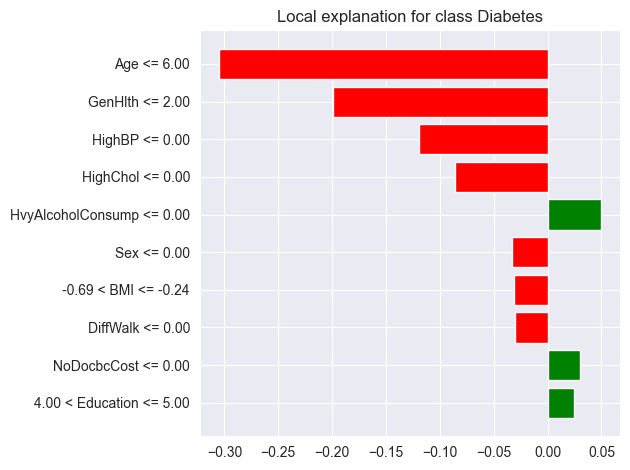

In [13]:
idx = 2
exp = explainer.explain_instance(
    data_row    = X_test.iloc[idx].values,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "knn_lime_exp_diabetes_2.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


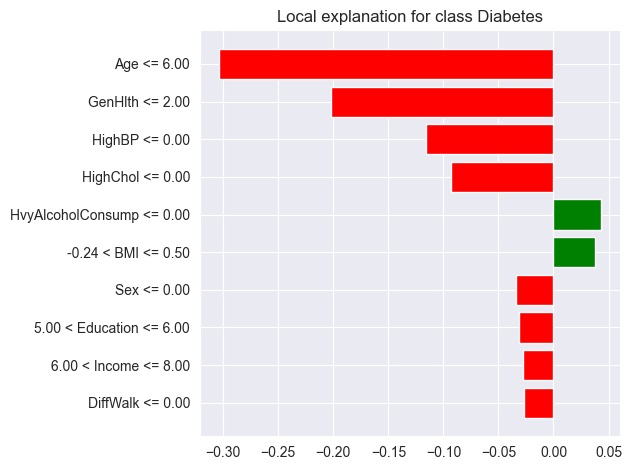

In [14]:
data_row     = obs_1p.values
exp = explainer.explain_instance(
    data_row    = data_row,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "knn_lime_exp_diabetes_1p.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


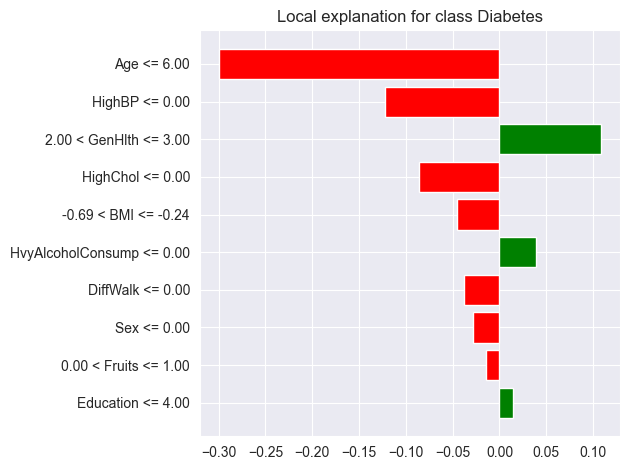

In [15]:
data_row     = obs_1n.values
exp = explainer.explain_instance(
    data_row    = data_row,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "knn_lime_exp_diabetes_1n.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

In [16]:
#X_test_sample = X_test[np.random.choice(len(X_test), 100, replace=False)]
idx = 1
exp = explainer.explain_instance(
    data_row        = X_test.iloc[idx].values,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])
print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Feature-Beitrag zur Klassenzuordnung:
8.00 < Age <= 10.00             →  +0.151
BMI > 0.50                      →  +0.140
0.00 < HighBP <= 1.00           →  +0.131
2.00 < GenHlth <= 3.00          →  +0.094
HighChol <= 0.00                →  -0.093
HvyAlcoholConsump <= 0.00       →  +0.048
Sex <= 0.00                     →  -0.044
Education <= 4.00               →  +0.025
Income <= 5.00                  →  +0.024
DiffWalk > 0.00                 →  +0.022


In [17]:
data_row     = obs_2p.values
feature_names = obs_2p.index.tolist()

exp = explainer.explain_instance(
    data_row        = data_row,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])

print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Feature-Beitrag zur Klassenzuordnung:
GenHlth <= 2.00                 →  -0.199
8.00 < Age <= 10.00             →  +0.152
BMI > 0.50                      →  +0.147
0.00 < HighBP <= 1.00           →  +0.119
HighChol <= 0.00                →  -0.086
HvyAlcoholConsump <= 0.00       →  +0.051
DiffWalk > 0.00                 →  +0.029
Education <= 4.00               →  +0.029
NoDocbcCost > 0.00              →  -0.026
Sex <= 0.00                     →  -0.025


In [18]:
data_row     = obs_2n.values
feature_names = obs_2n.index.tolist()

exp = explainer.explain_instance(
    data_row        = data_row,
    predict_fn      = predict_proba,
    num_features    = 10,
    top_labels      = 1
)

explanation_list = exp.as_list(label=exp.top_labels[0])

print("Feature-Beitrag zur Klassenzuordnung:")
for feature, weight in explanation_list:
    print(f"{feature:30s}  →  {weight:+.3f}")

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Feature-Beitrag zur Klassenzuordnung:
Age > 10.00                     →  +0.182
GenHlth > 3.00                  →  +0.180
BMI > 0.50                      →  +0.135
0.00 < HighBP <= 1.00           →  +0.121
HighChol <= 0.00                →  -0.083
HvyAlcoholConsump <= 0.00       →  +0.048
Sex <= 0.00                     →  -0.040
Stroke <= 0.00                  →  +0.036
DiffWalk > 0.00                 →  +0.024
Education <= 4.00               →  +0.019


C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


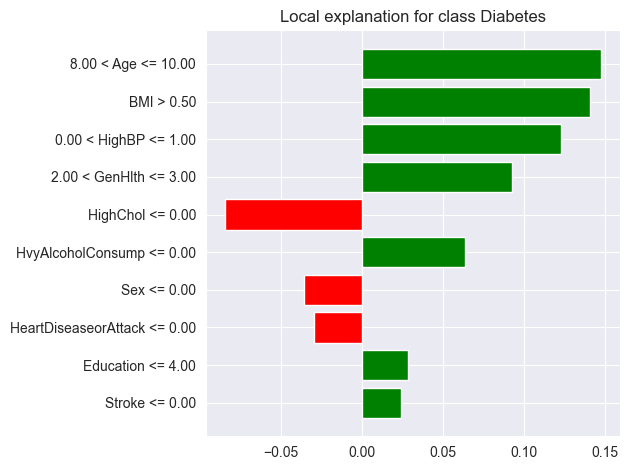

In [19]:
idx = 1
exp = explainer.explain_instance(
    data_row    = X_test.iloc[idx].values,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "knn_lime_exp_diabetes_1.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


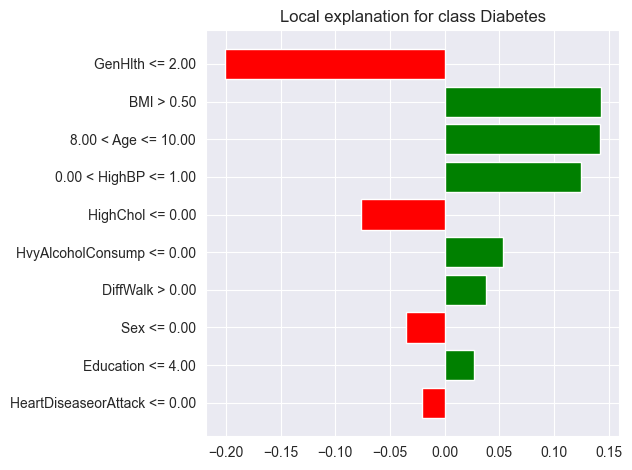

In [20]:
data_row     = obs_2p.values
exp = explainer.explain_instance(
    data_row    = data_row,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "knn_lime_exp_diabetes_2p.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()

C:\Users\haihu\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


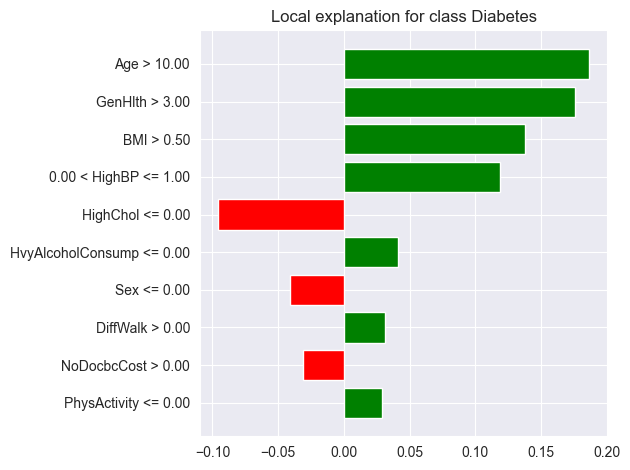

In [21]:
data_row     = obs_2n.values
exp = explainer.explain_instance(
    data_row    = data_row,
    predict_fn  = modell.predict_proba,
    num_features= 10,
    labels      = (1,)
)

fig1 = exp.as_pyplot_figure(label=1)
plt.tight_layout()

fig1.savefig(
    "knn_lime_exp_diabetes_2n.png",
    dpi=300,
    bbox_inches='tight',
    format='png',
    facecolor='w'
)

plt.show()